# <font color='blue'>Ensino Einstein</font>
## <font color='black'>Ciência de Dados e Informática para a Área da Saúde</font>
### <font color='gray'>Data Science 2 [ Python ]</font>

In [0]:
from IPython.display import Image
Image(url = 'images/processo_DataScience.png')

In [0]:
import warnings
warnings.filterwarnings("ignore")

### Definição do Problema de Negócio

Criação de um modelo preditivo que seja capaz de prever a chance de uma pessoa ser internada durante o processo de Triagem.

Primeiramente apenas os Sinais Vitais, posteriormente os Sinais Vitais em conjunto com as demais variáveis já pré selecionadas.

Dataset: HIAE_SSVV_v01.csv & HIAE_Triagem_v03.csv

Este dataset descreve os registros médicos entre pacientes do HIAE após a passagem pela Triagem, onde agora cada registro já possui a informação se o paciente internou ou não, de acordo com pré-processamento já realizado anteriormente.

### Informações sobre os atributos:

1. ...

### Extraindo e Carregando os Dados

In [0]:
# Carregando arquivo .csv
import pandas as pd
file_1 = 'data/HIAE_SSVV_v01.csv'
file_2 = 'data/HIAE_Triagem_v03.csv'
df_raw_1 = pd.read_csv(file_1, sep = ";")
df_raw_2 = pd.read_csv(file_2, sep = ";")

### Análise Exploratória de Dados

#### Estatística Descritiva

In [0]:
# Visualizando as primeiras 10 linhas
df_raw_1.head(10)

,T,PAd,PAs,FR,P,SpO2,T_str,T_num,PA_str,PA_num,FR_str,FR_num,P_str,P_num,SpO2_str,SpO2_num,Interna_num
0,36.4,76,113,18,79,96,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
1,36.7,74,118,16,75,98,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
2,36.2,82,114,17,86,97,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
3,36.6,77,133,16,115,94,Normotermia,2,Normotenso,2,Eupneico,2,Taquicardico,3,Normal,2,0
4,35.9,89,122,18,80,95,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
5,36.6,89,134,11,95,97,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
6,36.1,79,112,16,82,98,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
7,36.1,90,150,17,108,98,Normotermia,2,Hipertenso_Leve/Mod,3,Eupneico,2,Taquicardico,3,Normal,2,0
8,36.0,67,121,18,65,98,Normotermia,2,Normotenso,2,Eupneico,2,Normocardico,2,Normal,2,0
9,35.7,82,152,12,61,97,Normotermia,2,Hipertenso_Sistolica_Isolada,5,Eupneico,2,Normocardico,2,Normal,2,0


In [0]:
# Visualizando as primeiras 10 linhas
df_raw_2.head(10)

,temp_axilar,pad,pas,freq_respiratoria,pulso_periferico,spo,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,...,cardiologia_UPA,cma_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
0,36.4,76,113,18,79,96,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
1,36.7,74,118,16,75,98,0,0,0,0,...,0,0,7,0,0,0,0,3,0,0
2,36.2,82,114,17,86,97,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
3,36.6,77,133,16,115,94,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
4,35.9,89,122,18,80,95,0,0,0,0,...,0,0,7,0,0,0,0,3,0,0
5,36.6,89,134,11,95,97,0,0,0,0,...,0,0,7,0,0,0,0,3,0,0
6,36.1,79,112,16,82,98,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
7,36.1,90,150,17,108,98,0,0,0,0,...,0,0,1,0,0,0,0,3,0,0
8,36.0,67,121,18,65,98,0,0,0,0,...,0,0,8,0,0,0,0,3,0,0
9,35.7,82,152,12,61,97,0,0,1,0,...,0,0,0,0,0,0,0,4,0,0


In [0]:
pd.set_option('display.max_columns', 0) # mostrar todas as colunas

In [0]:
df_raw_2.describe()

,temp_axilar,pad,pas,freq_respiratoria,pulso_periferico,spo,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,cma_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
count,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.0,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000
mean,36.397966,77.171582,122.057746,16.351467,83.261820,97.257153,0.004284,0.005905,0.065620,0.320434,0.001308,0.002918,0.006288,1.467665,2.092820,0.000069,0.000371,0.0,4.005894,0.000012,0.001563,0.001621,0.004551,3.530054,0.003011,0.030430
std,0.706036,10.749010,17.035349,4.006891,15.902422,2.306020,0.065315,0.076620,0.247618,1.218392,0.036149,0.053940,0.079045,0.573701,1.356695,0.008335,0.019246,0.0,3.297022,0.003403,0.039507,0.040230,0.067305,0.577987,0.054787,0.171769
min,6.000000,0.000000,10.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,70.000000,110.000000,15.000000,73.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,36.300000,77.000000,120.000000,16.000000,82.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,36.700000,84.000000,132.000000,18.000000,92.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,40.100000,198.000000,419.000000,100.000000,600.000000,100.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.0,10.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [0]:
# Visualizando as dimensões
df_raw_1.shape

(86361, 17)

In [0]:
# Visualizando as dimensões
df_raw_2.shape

(86361, 26)

Preparando o Dataset 1 mantendo apenas as variáveis numéricas e elimando a variável "target", pois vamos utilizar a variável "target" do Dataset 2, a qual a mesma do Dataset 1.

In [0]:
# lista as colunas para referência
df_raw_1.columns

Index(['T', 'PAd', 'PAs', 'FR', 'P', 'SpO2', 'T_str', 'T_num', 'PA_str',
       'PA_num', 'FR_str', 'FR_num', 'P_str', 'P_num', 'SpO2_str', 'SpO2_num',
       'Interna_num'],
      dtype='object')

In [0]:
# Colunas para deletar
col2del = ['T', 'PAd', 'PAs', 'FR', 'P', 'SpO2', 
           'T_str', 'PA_str', 'FR_str', 'P_str', 'SpO2_str', 
           'Interna_num']

# Deleta as colunas
df_raw_1.drop(col2del, axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)

In [0]:
# Tipo de dados de cada atributo
df_raw_1.dtypes

T_num       int64
PA_num      int64
FR_num      int64
P_num       int64
SpO2_num    int64
dtype: object

In [0]:
# Sumário estatístico
df_raw_1.describe()

,T_num,PA_num,FR_num,P_num,SpO2_num
count,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000
mean,2.104862,2.108475,1.999491,2.115133,1.995750
std,0.532418,1.026320,0.107499,0.331848,0.072621
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000
max,6.000000,5.000000,3.000000,3.000000,2.000000


Preparando o Dataset 2 eliminando as variáveis SSVV, as quais já constam preparadas no Dataset 1 e já importadas.

In [0]:
# lista as colunas para referência
df_raw_2.columns

Index(['temp_axilar', 'pad', 'pas', 'freq_respiratoria', 'pulso_periferico',
       'spo', 'insulina_dependente', 'pac_oncologico', 'int_p_queda',
       'prec_tipo_UPA', 'prot_UPA_AVC', 'prot_UPA_IAM', 'prot_UPA_SEPSE',
       'recursos_ESI', 'upa_avaliacao_dor', 'avaliacao_dor_PAINAD',
       'cardiologia_UPA', 'cma_UPA', 'escala_verbal_numerica', 'esi_level_1',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')

In [0]:
# Colunas para deletar
col2del = ['temp_axilar', 'pad', 'pas', 'freq_respiratoria', 'pulso_periferico', 'spo']

# Deleta as colunas
df_raw_2.drop(col2del, axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)

In [0]:
# Tipo de dados de cada atributo
df_raw_2.dtypes

insulina_dependente       int64
pac_oncologico            int64
int_p_queda               int64
prec_tipo_UPA             int64
prot_UPA_AVC              int64
prot_UPA_IAM              int64
prot_UPA_SEPSE            int64
recursos_ESI              int64
upa_avaliacao_dor         int64
avaliacao_dor_PAINAD      int64
cardiologia_UPA           int64
cma_UPA                   int64
escala_verbal_numerica    int64
esi_level_1               int64
esi_level_2               int64
hematologia_UPA           int64
medico_externo_UPA        int64
nivel_recomendado_ESI     int64
oncologia_UPA             int64
Interna_num               int64
dtype: object

In [0]:
# Sumário estatístico
df_raw_2.describe()

,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,cma_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
count,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.0,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000
mean,0.004284,0.005905,0.065620,0.320434,0.001308,0.002918,0.006288,1.467665,2.092820,0.000069,0.000371,0.0,4.005894,0.000012,0.001563,0.001621,0.004551,3.530054,0.003011,0.030430
std,0.065315,0.076620,0.247618,1.218392,0.036149,0.053940,0.079045,0.573701,1.356695,0.008335,0.019246,0.0,3.297022,0.003403,0.039507,0.040230,0.067305,0.577987,0.054787,0.171769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,0.0,10.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


Alguma observação sobre o resumo estatístico acima?

In [0]:
# your code here...
df_raw_2bkp = df_raw_2
df_raw_2bkp.head(10)

df_raw_2.drop('cma_UPA', axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)


Criando um novo Dataset através da concatenação dos Datasets 1 e 2. 

In [0]:
#df_raw_2.describe()
df_raw_2bkp.describe()

,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
count,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000,86361.000000
mean,0.004284,0.005905,0.065620,0.320434,0.001308,0.002918,0.006288,1.467665,2.092820,0.000069,0.000371,4.005894,0.000012,0.001563,0.001621,0.004551,3.530054,0.003011,0.030430
std,0.065315,0.076620,0.247618,1.218392,0.036149,0.053940,0.079045,0.573701,1.356695,0.008335,0.019246,3.297022,0.003403,0.039507,0.040230,0.067305,0.577987,0.054787,0.171769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,4.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [0]:
df_raw = pd.concat([df_raw_1, df_raw_2], axis=1)
df_raw.head(10)

,T_num,PA_num,FR_num,P_num,SpO2_num,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
0,2,2,2,2,2,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,4,0,0
1,2,2,2,2,2,0,0,0,0,0,0,0,2,3,0,0,7,0,0,0,0,3,0,0
2,2,2,2,2,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0
3,2,2,2,3,2,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,3,0,0
4,2,2,2,2,2,0,0,0,0,0,0,0,2,3,0,0,7,0,0,0,0,3,0,0
5,2,2,2,2,2,0,0,0,0,0,0,0,2,0,0,0,7,0,0,0,0,3,0,0
6,2,2,2,2,2,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,4,0,0
7,2,3,2,3,2,0,0,0,0,0,0,0,2,3,0,0,1,0,0,0,0,3,0,0
8,2,2,2,2,2,0,0,0,0,0,0,0,2,3,0,0,8,0,0,0,0,3,0,0
9,2,5,2,2,2,0,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,4,0,0


In [0]:
# Filering NaN / 'Failed'
df_raw = df_raw[(df_raw['T_num'] != 0) & (df_raw['PA_num'] != 0) & (df_raw['FR_num'] != 0) & (df_raw['P_num'] != 0) & (df_raw['SpO2_num'] != 0)]

In [0]:
# View
df_raw.shape

(78709, 24)

In [0]:
# View
df_raw.head(10)

,T_num,PA_num,FR_num,P_num,SpO2_num,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
0,2,2,2,2,2,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,4,0,0
1,2,2,2,2,2,0,0,0,0,0,0,0,2,3,0,0,7,0,0,0,0,3,0,0
2,2,2,2,2,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0
3,2,2,2,3,2,0,0,0,0,0,0,0,2,3,0,0,0,0,0,0,0,3,0,0
4,2,2,2,2,2,0,0,0,0,0,0,0,2,3,0,0,7,0,0,0,0,3,0,0
5,2,2,2,2,2,0,0,0,0,0,0,0,2,0,0,0,7,0,0,0,0,3,0,0
6,2,2,2,2,2,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,4,0,0
7,2,3,2,3,2,0,0,0,0,0,0,0,2,3,0,0,1,0,0,0,0,3,0,0
8,2,2,2,2,2,0,0,0,0,0,0,0,2,3,0,0,8,0,0,0,0,3,0,0
9,2,5,2,2,2,0,0,1,0,0,0,0,1,3,0,0,0,0,0,0,0,4,0,0


In [0]:
# Write DataFrame to a comma-separated values (csv) file
file = 'data/HIAE_Triagem_v04.csv'
df_raw.to_csv(file, sep = ";", index = False)

Em problemas de classificação pode ser necessário balancear as classes. Aqui existe uma clara desproporção entre as classes 0 (paciente não interna) e 1 (paciente interna).

In [0]:
# Distribuição das classes
df_raw.groupby('Interna_num').size()

Interna_num
0    76340
1     2369
dtype: int64

In [0]:
# Balanceamento (Down-sample Majority Class)

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df_raw[df_raw.Interna_num == 0]
df_minority = df_raw[df_raw.Interna_num == 1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                   replace = False,    # sample without replacement
                                   n_samples = 2369,   # to match minority class
                                   random_state = 123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.Interna_num.value_counts()

1    2369
0    2369
Name: Interna_num, dtype: int64

In [0]:
df_downsampled.describe()

,T_num,PA_num,FR_num,P_num,SpO2_num,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.0,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000
mean,2.093077,2.445758,2.012241,2.127058,1.980371,0.010975,0.032292,0.157450,0.317222,0.004010,0.005276,0.036302,1.691009,2.116083,0.000422,0.002111,3.899958,0.0,0.004854,0.012030,0.028071,3.303081,0.020684,0.500000
std,0.542077,0.995086,0.115589,0.341831,0.138735,0.104197,0.176793,0.364263,1.207623,0.063205,0.072455,0.187061,0.511559,1.343178,0.020543,0.045898,3.488350,0.0,0.069511,0.109033,0.165193,0.519572,0.142339,0.500053
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.500000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,7.000000,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
max,5.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,10.000000,0.0,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


Alguma observação sobre o resumo estatístico acima?

In [0]:
# your code here...
df_downsampled.groupby('esi_level_1').size()

esi_level_1
0    4738
dtype: int64

In [0]:
df_downsampled_bkp = df_downsampled

In [0]:
df_downsampled_bkp.describe()

,T_num,PA_num,FR_num,P_num,SpO2_num,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_1,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.0,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000
mean,2.093077,2.445758,2.012241,2.127058,1.980371,0.010975,0.032292,0.157450,0.317222,0.004010,0.005276,0.036302,1.691009,2.116083,0.000422,0.002111,3.899958,0.0,0.004854,0.012030,0.028071,3.303081,0.020684,0.500000
std,0.542077,0.995086,0.115589,0.341831,0.138735,0.104197,0.176793,0.364263,1.207623,0.063205,0.072455,0.187061,0.511559,1.343178,0.020543,0.045898,3.488350,0.0,0.069511,0.109033,0.165193,0.519572,0.142339,0.500053
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,0.500000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,7.000000,0.0,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
max,5.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,10.000000,0.0,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [0]:
df_downsampled.drop('esi_level_1', axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)

In [0]:
df_downsampled.describe()

,T_num,PA_num,FR_num,P_num,SpO2_num,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
count,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000,4738.000000
mean,2.093077,2.445758,2.012241,2.127058,1.980371,0.010975,0.032292,0.157450,0.317222,0.004010,0.005276,0.036302,1.691009,2.116083,0.000422,0.002111,3.899958,0.004854,0.012030,0.028071,3.303081,0.020684,0.500000
std,0.542077,0.995086,0.115589,0.341831,0.138735,0.104197,0.176793,0.364263,1.207623,0.063205,0.072455,0.187061,0.511559,1.343178,0.020543,0.045898,3.488350,0.069511,0.109033,0.165193,0.519572,0.142339,0.500053
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.500000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
max,5.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [0]:
dados = df_downsampled

In [0]:
df_downsampled.shape

(4738, 23)

In [0]:
dados.shape

(4738, 23)

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

(!!!) Alguns algoritmos como Regressão Linear e Regressão Logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares)

In [0]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,T_num,PA_num,FR_num,P_num,SpO2_num,insulina_dependente,pac_oncologico,int_p_queda,prec_tipo_UPA,prot_UPA_AVC,prot_UPA_IAM,prot_UPA_SEPSE,recursos_ESI,upa_avaliacao_dor,avaliacao_dor_PAINAD,cardiologia_UPA,escala_verbal_numerica,esi_level_2,hematologia_UPA,medico_externo_UPA,nivel_recomendado_ESI,oncologia_UPA,Interna_num
T_num,1.000000,-0.024882,0.032349,0.305286,-0.040264,-0.018090,-0.057803,-0.050714,0.070335,-0.023219,-0.023257,0.122811,0.007815,-0.005275,-0.003529,-0.007898,0.056503,0.016019,-0.047523,-0.022111,-0.007240,-0.063260,0.019859
PA_num,-0.024882,1.000000,0.058999,-0.036831,-0.048236,0.058679,0.022558,0.133640,0.025126,0.008494,-0.003349,0.040068,0.127559,0.003922,0.021774,0.002507,-0.043648,-0.000770,0.022554,0.056139,-0.125804,0.018356,0.137881
FR_num,0.032349,0.058999,1.000000,0.072826,-0.314119,0.076482,0.001313,0.129696,0.070477,0.022175,-0.007714,0.272343,0.063982,0.005802,-0.002177,-0.004871,-0.077589,0.018876,-0.011688,-0.018000,-0.061791,-0.028224,0.087655
P_num,0.305286,-0.036831,0.072826,1.000000,-0.076492,-0.015452,0.033395,0.002060,0.069054,-0.013817,-0.001504,0.135841,0.062791,-0.022475,-0.007639,0.009815,0.012964,0.009574,0.021284,0.000379,-0.064726,-0.001960,0.050635
SpO2_num,-0.040264,-0.048236,-0.314119,-0.076492,1.000000,-0.101923,-0.025793,-0.172761,-0.025828,-0.015096,0.010306,-0.452470,-0.079527,-0.008161,-0.145231,0.006507,0.077948,-0.012008,-0.012297,-0.003587,0.079620,-0.043578,-0.132369
insulina_dependente,-0.018090,0.058679,0.076482,-0.015452,-0.101923,1.000000,0.083895,0.099073,0.005879,-0.006684,0.020290,0.055370,0.047793,0.002962,-0.002165,-0.004845,-0.057962,0.050936,0.025539,0.006627,-0.049757,0.084327,0.048619
pac_oncologico,-0.057803,0.022558,0.001313,0.033395,-0.025793,0.083895,1.000000,0.199666,0.013314,0.007301,0.003176,0.130512,0.089342,-0.052238,-0.003754,0.017615,-0.103613,0.038776,0.363144,0.041239,-0.090483,0.518734,0.146855
int_p_queda,-0.050714,0.133640,0.129696,0.002060,-0.172761,0.099073,0.199666,1.000000,0.006888,0.082600,-0.007489,0.188733,0.192032,-0.012339,0.047537,0.030626,-0.168024,0.036506,0.143646,0.045814,-0.191961,0.201826,0.270036
prec_tipo_UPA,0.070335,0.025126,0.070477,0.069054,-0.025828,0.005879,0.013314,0.006888,1.000000,-0.016670,-0.007070,0.083580,-0.045991,-0.114070,-0.005399,-0.012082,-0.042627,0.031948,0.004679,0.005089,0.038176,-0.001336,-0.008565
prot_UPA_AVC,-0.023219,0.008494,0.022175,-0.013817,-0.015096,-0.006684,0.007301,0.082600,-0.016670,1.000000,0.041476,-0.012315,0.038331,-0.000511,-0.001304,-0.002918,-0.041266,-0.004432,-0.007002,0.009435,-0.037018,-0.009222,0.016698


#### Visualização com Matplotlib

In [0]:
import matplotlib.pyplot as plt

# %matplotlib inline # Gráficos em janela separada

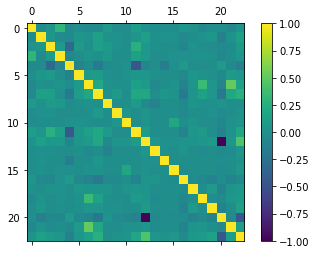

In [0]:
# Matriz de Correlação (- nome das variáveis)
correlations = dados.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

In [0]:
dados.columns

Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'recursos_ESI', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')

In [0]:
colunas = ['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente', 'pac_oncologico', 
           'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC', 'prot_UPA_IAM', 'prot_UPA_SEPSE', 
           'recursos_ESI', 'upa_avaliacao_dor', 'avaliacao_dor_PAINAD', 'cardiologia_UPA', 
           'escala_verbal_numerica', 'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA', 
           'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num']

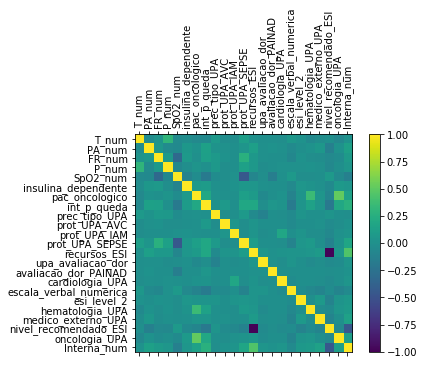

In [0]:
# Matriz de Correlação (+ nome das variáveis)
correlations = dados.corr()

# Plot
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 23, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas, rotation='vertical')
ax.set_yticklabels(colunas)
plt.show()

Colinearidade das variáveis nível_recomendado_ESI com recursos_ESI se for muito alto tira prot_UPA_SEPSE

### Preparando os Dados para Machine Learning

Muitos algoritmos esperam receber os dados em um formato específico. Você deve preparar os dados de acordo com uma estrutura que seja adequada ao algoritmo que você irá utilizar, o que pode requerer transformações diferentes nos dados. Ainda, é possível que em alguns casos, bons resultados sejam obtidos sem um trabalho de pré-processamento, mas é uma boa prática criar diferentes transformações dos dados para realizar testes em diferentes algoritmos de Machine Learning.

#### Normalização - Método 1

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Uma das primeiras tarefas dentro do pré-processamento é colocar os dados em uma mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar desse processamento e produzir resultados melhores. Esta etapa também é chamada de Normalização e significa colocar os dados em uma escala entre 0 e 1.

(!!!) Importantíssimo para o processo de otimização, assim como para algoritmos como Regressão e Redes Neurais e algoritmos que usam medidas de distância, como KNN.

O scikit-learn possui uma função para esse processamento, chamada MinMaxScaler().

In [0]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from sklearn.preprocessing import MinMaxScaler

array = dados.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:, 0:22]
Y = array[:, 22]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[2 2 2 ... 4 0 0]
 [2 2 2 ... 4 0 0]
 [2 2 2 ... 4 0 0]
 ...
 [2 3 2 ... 3 1 1]
 [2 2 2 ... 3 0 1]
 [2 3 2 ... 3 0 1]]

Dados Normalizados: 

 [[0.25       0.25       0.5        ... 0.         0.66666667 0.        ]
 [0.25       0.25       0.5        ... 0.         0.66666667 0.        ]
 [0.25       0.25       0.5        ... 0.         0.66666667 0.        ]
 ...
 [0.25       0.5        0.5        ... 0.         0.33333333 1.        ]
 [0.25       0.25       0.5        ... 0.         0.33333333 0.        ]
 [0.25       0.5        0.5        ... 0.         0.33333333 0.        ]]


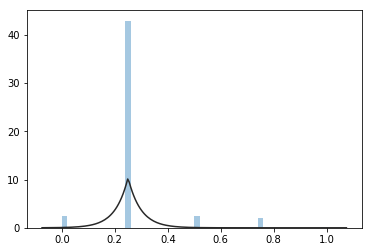

In [0]:
# Visualização com Seaborn
import seaborn as sns
from scipy import stats

sns.distplot(rescaledX[:, 0], fit = stats.laplace, kde = False)

#### Normalização - Método 2

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

No scikit-learn, Normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear).

(!!!) Importantíssimo quando temos Datasets esparsos (com muitos zeros) e atributos com escala muito variada, assim como para algoritmos de Redes Neurais ou que usam medida de distância, como KNN.

O scikit-learn possui uma função para esta etapa, chamada Normalizer().

In [0]:
# Normalizando os dados (comprimento igual a 1)
from sklearn.preprocessing import Normalizer

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
Y = array[:, 22]

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", normalizedX)

Dados Originais: 

 [[2 2 2 ... 4 0 0]
 [2 2 2 ... 4 0 0]
 [2 2 2 ... 4 0 0]
 ...
 [2 3 2 ... 3 1 1]
 [2 2 2 ... 3 0 1]
 [2 3 2 ... 3 0 1]]

Dados Normalizados: 

 [[0.23408229 0.23408229 0.23408229 ... 0.         0.46816459 0.        ]
 [0.29488391 0.29488391 0.29488391 ... 0.         0.58976782 0.        ]
 [0.20519567 0.20519567 0.20519567 ... 0.         0.41039134 0.        ]
 ...
 [0.16903085 0.25354628 0.16903085 ... 0.         0.25354628 0.08451543]
 [0.3086067  0.3086067  0.3086067  ... 0.         0.46291005 0.        ]
 [0.1898316  0.2847474  0.1898316  ... 0.         0.2847474  0.        ]]


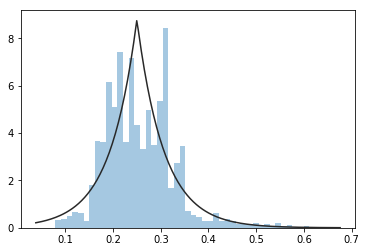

In [0]:
sns.distplot(normalizedX[:, 0], fit = stats.laplace, kde = False)

#### Padronização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1.

(!!!) Importantíssimo para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como Regressão Linear, Regressão Logística e Linear Discriminant Analysis (LDA). Funciona bem quando os dados já estão na mesma escala.

O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [0]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from sklearn.preprocessing import StandardScaler

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
Y = array[:, 22]

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX)

Dados Originais: 

 [[2 2 2 ... 4 0 0]
 [2 2 2 ... 4 0 0]
 [2 2 2 ... 4 0 0]
 ...
 [2 3 2 ... 3 1 1]
 [2 2 2 ... 3 0 1]
 [2 3 2 ... 3 0 1]]

Dados Padronizados: 

 [[-0.17172313 -0.44800623 -0.10591633 ... -0.16994602  1.34147465
  -0.14532959]
 [-0.17172313 -0.44800623 -0.10591633 ... -0.16994602  1.34147465
  -0.14532959]
 [-0.17172313 -0.44800623 -0.10591633 ... -0.16994602  1.34147465
  -0.14532959]
 ...
 [-0.17172313  0.55703805 -0.10591633 ... -0.16994602 -0.58339116
   6.88091119]
 [-0.17172313 -0.44800623 -0.10591633 ... -0.16994602 -0.58339116
  -0.14532959]
 [-0.17172313  0.55703805 -0.10591633 ... -0.16994602 -0.58339116
  -0.14532959]]


C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


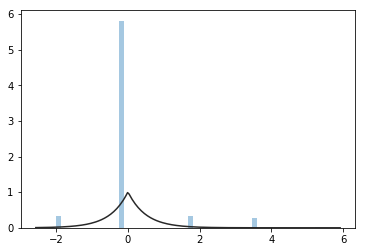

In [0]:
sns.distplot(standardX[:, 0], fit = stats.laplace, kde = False)


### Feature Selection

Os atributos presentes no seu Dataset e que você utiliza nos dados de treino terão grande influência na precisão e resultado do seu modelo preditivo.

(!!!) Importantíssimo notar que atributos irrelevantes geram um impacto negativo na performance, enquanto que atributos colineares podem afetar o grau de acurácia do modelo.

O scikit-learn possui funções que automatizam o trabalho de extração e seleção de variáveis.

A etapa de Feature Selection é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. O Feature Selection nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

#### Eliminação Recursiva de Atributos (Recursive Feature Elimination - RFE)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Técnica para seleção de atributos que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo.

O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de Regressão Logística para selecionar uma quantidade predefinida das melhores variáveis preditoras, as quais marcadas como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos".

In [0]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
Y = array[:, 22]

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 11)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", dados.columns[0:22])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'recursos_ESI', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA'],
      dtype='object')
Variáveis Selecionadas: [False False False False  True False  True  True False False False  True
  True False False  True False  True  True  True  True  True]
Ranking dos Atributos: [ 6  5  2  8  1 10  1  1 11  3  4  1  1  9  7  1 12  1  1  1  1  1]
Número de Melhores Atributos: 11


#### Método Ensemble para Seleção de Variáveis (ExtraTreesClassifier)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo, retornando um score para cada um dos mesmos.

In [0]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from sklearn.ensemble import ExtraTreesClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
Y = array[:, 22]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(dados.columns[0:22])
print(modelo.feature_importances_)

Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'recursos_ESI', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA'],
      dtype='object')
[5.56723913e-02 5.62894494e-02 7.21888055e-03 3.14448173e-02
 2.82524070e-02 6.90363352e-03 3.27686880e-02 8.82649122e-02
 2.65597813e-02 3.72093852e-03 4.80913992e-03 1.88487127e-02
 3.29912710e-01 3.48078658e-02 2.14645889e-04 2.73655982e-03
 1.42951215e-01 4.87335703e-03 7.42987199e-03 3.59291783e-02
 6.44019333e-02 1.59889106e-02]


### Amostragem - Resampling

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Para tanto, devemos fazer previsões em dados que você já conhece o resultado, mas que o modelo não. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.

#### Dados de Treino e de Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Método mais utilizado para avaliar a performance de um algoritmo de Machine Learning. Divide-se os dados originais em dados de treino e de teste. Treina-se o algoritmo nos dados de treino e então se faze as previsões nos dados de teste e avalia-se o resultado. A divisão dos dados depende do seu Dataset, mas proporções entre 70/30 (treino/teste) e 65/35 (treino/teste) são muito frequentes.

Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [0]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from sklearn.model_selection import train_test_split

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22] # **
# X = rescaledX      # *
# X = normalizedX    # ****
# X = standardX      # ***
Y = array[:, 22]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 70.908%


#### Cross Validation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes chamadas k-folds. Cada parte é chamada fold e o algoritmo é treinado em k-1 folds, isso é, cada fold é usado no treinamento de forma repetida, um fold por vez. Após executar o processo em k-1 folds, sumariza-se a performance em cada fold usando a média e o desvio padrão. O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [0]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

In [0]:
# Avaliação usando Cross Validation

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22] # ***
# X = rescaledX      # **
# X = normalizedX    # ****
# X = standardX      # *
Y = array[:, 22]

# Definindo os valores para os folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 70.536%


### Avaliando a Performance

As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. A função cross_validation.cross_val_score() será usada para avaliar a performance.

#### Métricas para Algoritmos de Classificação

https://scikit-learn.org/stable/modules/model_evaluation.html

In [0]:
# Acurácia
# Número de previsões corretas. É útil apenas quando existe um balanceamento entre as classes.

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.536


In [0]:
# Curva ROC 
# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos definir as classes em positivas e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.
# Sensitivity é a taxa de verdadeiros positivos (TP). Ese é o número de instâncias positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram previstas corretamente.
# Valores acima de 0.5 indicam uma boa taxa de previsão.

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criando o modelo
model = LogisticRegression()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f" % (resultado.mean() * 100))

AUC: 78.824


C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

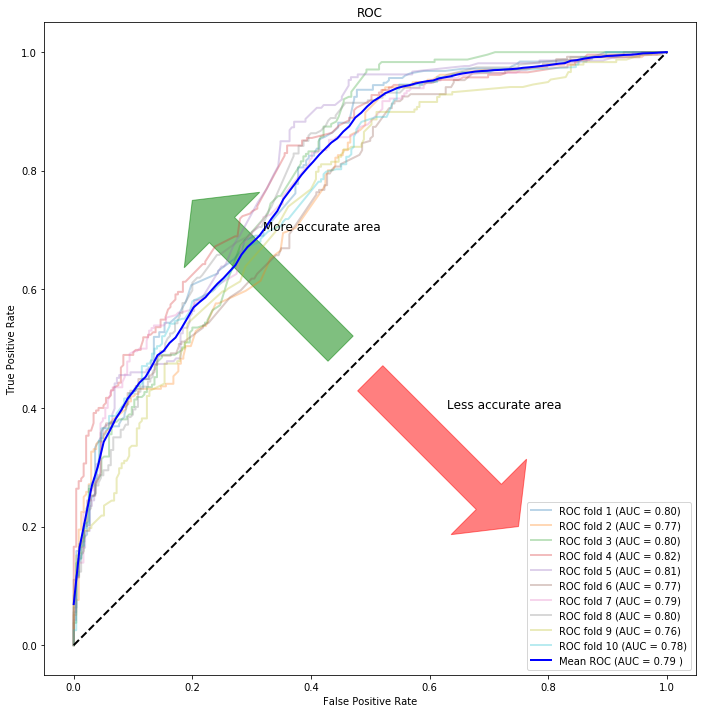

In [0]:
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp

# plot arrows
fig1 = plt.figure(figsize = [12, 12])
ax1 = fig1.add_subplot(111, aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45, 0.5, -0.25, 0.25, width = 0.3, color = 'green', alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5, 0.45, 0.25, -0.25, width = 0.3, color = 'red', alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 1
for train,test in kfold.split(X,Y):
    prediction = model.fit(pd.DataFrame(X).iloc[train],pd.DataFrame(Y).iloc[train]).predict_proba(pd.DataFrame(X).iloc[test])
    fpr, tpr, t = roc_curve(Y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw = 2, alpha = 0.3, label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i = i + 1

plt.plot([0, 1],[0, 1], linestyle = '--', lw = 2, color = 'black')
mean_tpr = np.mean(tprs, axis = 0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color = 'blue',
         label = r'Mean ROC (AUC = %0.2f )' % (mean_auc), lw = 2, alpha = 1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = "lower right")
plt.text(0.32, 0.7, 'More accurate area', fontsize = 12)
plt.text(0.63, 0.4, 'Less accurate area', fontsize = 12)
plt.show()

In [0]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from sklearn.model_selection import train_test_split

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[448 320]
 [135 661]]


In [0]:
# Relatório de Classificação

# Import dos módulos
from sklearn.model_selection import train_test_split

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

           0       0.77      0.58      0.66       768
           1       0.67      0.83      0.74       796

   micro avg       0.71      0.71      0.71      1564
   macro avg       0.72      0.71      0.70      1564
weighted avg       0.72      0.71      0.70      1564



## Algoritmos de Classificação

Não há como como saber qual algoritmo vai funcionar melhor na construção de um modelo antes de o testarmos com um Dataset. O ideal é testar alguns algoritmos e então escolher o que fornece melhor nível de precisão (nesse caso, já que estamos com nossas classes balanceadas e estamos definindo essa estratégia). Vamos testar um conjunto de algoritmos de classificação nas mesmas condições e validarmos nossas conclusões.

### Regressão Logística

Algoritmo Linear. O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.536


### Linear Discriminant Analysis (LDA)

Algoritmo Linear. Técnica estatística para classificação binária. Também assume que os dados estão em Distribuição Normal.

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = LinearDiscriminantAnalysis()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.979


### KNN (K-Nearest Neighbors)

Algoritmo Não-Linear que utiliza uma métrica de distância para encontrar o valor de K mais adequado as instâncias do Dataset de treino.

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.979


### Naive Bayes

Algoritmo Não-Linear. Calcula a probabilidade de cada classe e a probabilidade condicional de cada classe dado uma variável de entrada. As probabilidades são então estimadas para os novos dados e multiplicadas, assumindo que são independentes (suposição simples ou Naive). Assume dados em distirbuição Gaussiana (Normal)

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 59.772


### CART (Classification and Regression Trees)

Algoritmo Não-Linear. O algoritmo CART constrói uma árvore binária a partir do Dataset de treino. Cada atributo e cada valor de cada atributo são avaliados com o objetivo de reduzir a função de custo (Cost Function).

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = DecisionTreeClassifier()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 67.053


## Seleção do Modelo Preditivo

LR: 0.705355 (0.015672)
LDA: 0.709786 (0.018710)
NB: 0.597716 (0.020173)
KNN: 0.624523 (0.025826)
CART: 0.670949 (0.018657)


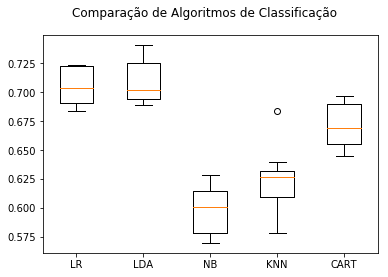

In [0]:
# Import dos módulos
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Quanto menor o coeficiente de variação (CV), também conhecido como desvio padrão relativo (DPR), maior a precisão dos dados.

CV ou DPR = Desvio Padrão / Média

Avalie qual algoritmo oferecerá maior confiabilidade: 

LR  : 0.022218599145111328

LDA : 0.026360057820244413

NB  : 0.03375014220800514

KNN : 0.04135316073227087

CART: 0.025940868829076428

In [0]:
# Desvio Padrão / Média 
# Cálculo do LR: 0.705355 (0.015672)
0.015672 / 0.705355

0.022218599145111328

In [0]:
# Desvio Padrão / Média 
# Cálculo do LDA: 0.709786 (0.018710)
0.018710 / 0.709786

0.026360057820244413

In [0]:
# Desvio Padrão / Média 
# Cálculo do NB: 0.597716 (0.020173)
0.020173 / 0.597716

0.03375014220800514

In [0]:
# Desvio Padrão / Média 
# Cálculo do KNN: 0.624523 (0.025826)
0.025826 / 0.624523

0.04135316073227087

In [0]:
# Desvio Padrão / Média 
# Cálculo do CART: 0.670949 (0.017405)
0.017405 / 0.670949

0.025940868829076428

Conclusão o LR é mais confiável mesmo com o LDA tendo uma média melhor 

### Otimização do Modelo - Ajuste de Hyperparâmetros

Todos os algoritmos de Machine Learning são parametrizados, o que significa que você pode ajustar a performance do seu modelo preditivo através do "tuning" (ajuste fino) dos parâmetros. 

(!!!) É importantíssimo encontrar a melhor combinação entre os parâmetros em cada algoritmo de Machine Learning, e esse processo também é chamado de Otimização de Hyperparâmetros.

O scikit-learn oferece dois métodos para otimização automática dos parâmetros: Grid Search Parameter Tuning e Random Search Parameter Tuning. 

#### Grid Search Parameter Tuning

Este método realiza combinações entre todos os parâmetros do algoritmo, criando um grid. Vamos experimentar este método utilizando o algoritmo de Regressão Logística. 

In [0]:
# Import dos módulos
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Acurácia: 71.064
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Random Search Parameter Tuning

Este método gera amostras dos parâmetros dos algoritmos a partir de uma distribuição randômica uniforme para um número fixo de iterações. Um modelo é construído e testado para cada combinação de parâmetros.

In [0]:
# Import dos módulos
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores que serão testados
seed = 7
iterations = 14

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Acurácia: 71.064
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\Sandro\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Otimizando Performance com Métodos Ensemble

Métodos Ensemble permitem aumentar consideravelmente o nível de precisão nas suas previsões. Vamos criar alguns dos Métodos Ensemble mais poderosos em Python, dos quais 3 principais para combinar previsões a partir de diferentes modelos:

Bagging - Para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsets no dataset de treino.

Boosting - Para construção de múltiplos modelos (normalmente do mesmo tipo), onde cada modelo aprende a corrigir os erros gerados pelo modelo anterior, dentro da sequência de modelos criados.

Voting - Para construção de múltiplos modelos (normalmente de tipos diferentes) e estatísticas simples (como a média) são usadas para combinar as previsões.

### Bagged Decision Trees

Funciona bem quando existe alta variância nos dados

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Cria o modelo unitário (classificador fraco)
cart = DecisionTreeClassifier()

# Definindo o número de trees
num_trees = 100

# Criando o modelo bagging
modelo = BaggingClassifier(base_estimator = cart, 
                           n_estimators = num_trees, 
                           random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 68.108


### Random Forest

Random Forest é uma extensão do Baggig Decision Tree. Amostras do Dataset de treino são usadas com reposição, mas as árvores são criadas de uma forma que reduz a correlação entre classificadores individuais (Random Forest é um conjunto de árvores de decisão).

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 5

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, 
                                max_features = max_features, 
                                random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 68.551


### AdaBoost

Algoritmos baseados em Boosting Ensemble criam uma sequência de modelos que tentam corrigir os erros dos modelos anteriores dentro da sequência. Uma vez criados, os modelos fazem previsões que podem receber um peso de acordo com sua acurácia e os resultados são combinados para criar uma previsão única final. 

O AdaBoost atribui pesos às instâncias no Dataset, definindo quão fácil ou difícil elas são para o processo de classificação, permitindo que o algoritmo tenha mais ou menos atenção às instâncias durante o processo de construção dos modelos.

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.662


### Gradient Boosting

Também chamado Stochastic Gradient Boosting, é um dos métodos Ensemble mais sofisticados.

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 71.274


### Voting Ensemble

Este é um dos métodos Ensemble mais simples. Este método cria dois ou mais modelos separados a partir do Dataset de treino. O Classificador Voting então utiliza a média das previsões de cada sub-modelo para fazer as previsões em novos conjuntos de dados. As previsões de cada sub-modelo podem receber pesos, através de parâmetros definidos manualmente ou através de heurística.

In [0]:
# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

array = dados.values

# Separando o array em componentes de input e output
X = array[:, 0:22]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 22]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Criando os modelos
estimators = []

modelo1 = LogisticRegression()
estimators.append(('logistic', modelo1))

modelo2 = DecisionTreeClassifier()
estimators.append(('cart', modelo2))

modelo3 = SVC()
estimators.append(('svm', modelo3))

# Criando o modelo ensemble
ensemble = VotingClassifier(estimators)

# Cross Validation
resultado = cross_val_score(ensemble, X, Y, cv = kfold)

# Resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.641


##### Desenvolva abaixo uma nova abordagem utilizando as variáveis selecionadas pela Eliminação Recursiva de Atributos (Recursive Feature Elimination - RFE)

In [0]:
# your code here...
# Atividade realizada em 28/09/2019
#dados.shape
#dados.describe()
#dados.columns

In [0]:
# criando dados exercicio
dados_exerc = dados

In [0]:
dados_exerc.columns

Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'recursos_ESI', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')

In [0]:
rescaledX_exerc = rescaledX

In [0]:
normalizedX_exerc = normalizedX

In [0]:
standardX_exerc = standardX

In [0]:
dados_exerc.shape

(4738, 23)

In [0]:
rescaledX_exerc.shape

(4738, 22)

In [0]:
normalizedX_exerc.shape

(4738, 22)

In [0]:
standardX_exerc.shape

(4738, 22)

In [0]:
# Remover a coluna recursos_ESI

In [0]:
# Colunas para deletar
# col2del = ['T_num', 'P_num']

# Deleta as colunas
# dados.drop(col2del, axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)

# print(dados.shape)

# dados.head()

In [0]:
# rescaledX = np.delete(rescaledX, obj = [0, 3], axis = 1) # 'axis' = 0 (row) | axis = 1 (column)

# print(rescaledX.shape)
# print(rescaledX)

In [0]:
# normalizedX = np.delete(normalizedX, [0, 3], axis = 1) # 'axis' = 0 (row) | axis = 1 (column)

# print(normalizedX.shape)
# print(normalizedX)

In [0]:
# standardX = np.delete(standardX, [0, 3], 1) # 'axis' = 0 (row) | axis = 1 (column)

# print(standardX.shape)
# print(standardX)

In [0]:
# Remoção recursos_ESI
dados_exerc.drop('recursos_ESI', axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)

In [0]:
dados_exerc.shape

(4738, 22)

In [0]:
dados_exerc.columns

Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')

In [0]:
# Excluindo rescaledX_exerc
rescaledX_exerc = np.delete(rescaledX_exerc, obj = [12], axis = 1) # 'axis' = 0 (row) | axis = 1 (column)

print(rescaledX_exerc.shape)
print(rescaledX_exerc)

(4738, 21)
[[0.25       0.25       0.5        ... 0.         0.66666667 0.        ]
 [0.25       0.25       0.5        ... 0.         0.66666667 0.        ]
 [0.25       0.25       0.5        ... 0.         0.66666667 0.        ]
 ...
 [0.25       0.5        0.5        ... 0.         0.33333333 1.        ]
 [0.25       0.25       0.5        ... 0.         0.33333333 0.        ]
 [0.25       0.5        0.5        ... 0.         0.33333333 0.        ]]


In [0]:
# Excluindo normalizedX_exerc
normalizedX_exerc = np.delete(normalizedX_exerc, [12], axis = 1) # 'axis' = 0 (row) | axis = 1 (column)

print(normalizedX_exerc.shape)
print(normalizedX_exerc)

(4738, 21)
[[0.23408229 0.23408229 0.23408229 ... 0.         0.46816459 0.        ]
 [0.29488391 0.29488391 0.29488391 ... 0.         0.58976782 0.        ]
 [0.20519567 0.20519567 0.20519567 ... 0.         0.41039134 0.        ]
 ...
 [0.16903085 0.25354628 0.16903085 ... 0.         0.25354628 0.08451543]
 [0.3086067  0.3086067  0.3086067  ... 0.         0.46291005 0.        ]
 [0.1898316  0.2847474  0.1898316  ... 0.         0.2847474  0.        ]]


In [0]:
# standardX_exerc
standardX_exerc = np.delete(standardX_exerc, [12], 1) # 'axis' = 0 (row) | axis = 1 (column)

print(standardX_exerc.shape)
print(standardX_exerc)

(4738, 21)
[[-0.17172313 -0.44800623 -0.10591633 ... -0.16994602  1.34147465
  -0.14532959]
 [-0.17172313 -0.44800623 -0.10591633 ... -0.16994602  1.34147465
  -0.14532959]
 [-0.17172313 -0.44800623 -0.10591633 ... -0.16994602  1.34147465
  -0.14532959]
 ...
 [-0.17172313  0.55703805 -0.10591633 ... -0.16994602 -0.58339116
   6.88091119]
 [-0.17172313 -0.44800623 -0.10591633 ... -0.16994602 -0.58339116
  -0.14532959]
 [-0.17172313  0.55703805 -0.10591633 ... -0.16994602 -0.58339116
  -0.14532959]]


LR: 0.700502 (0.021797)
LDA: 0.702194 (0.018692)
NB: 0.591176 (0.022895)
KNN: 0.641823 (0.022804)
CART: 0.668837 (0.018086)


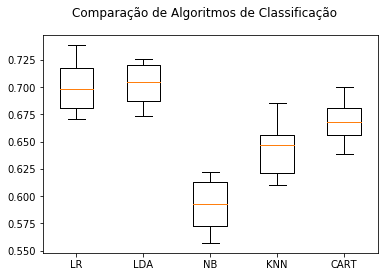

In [0]:
# Seleção do Modelo Preditivo
# Import dos módulos
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

array = dados_exerc.values

# Separando o array em componentes de input e output
# X = array[:, 0:21]
# X = rescaledX_exerc
X = normalizedX_exerc
# X = standardX_exerc
# Y = array[:, 21]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [0]:
# Dados Normais
# LR: 0.704299 (0.016346)
# LDA: 0.706198 (0.017770)
# NB: 0.597716 (0.020173)
# KNN: 0.622624 (0.024292)
# CART: 0.670526 (0.020073)

# Dados rescaledX_exerc
# LR: 0.704932 (0.016251)
# LDA: 0.706198 (0.017770)
# NB: 0.597716 (0.020173)
# KNN: 0.626207 (0.022096)
# CART: 0.670526 (0.019549)

# Dados normalizedX_exerc
# LR: 0.700502 (0.021797)
# LDA: 0.702194 (0.018692)
# NB: 0.591176 (0.022895)
# KNN: 0.641823 (0.022804)
# CART: 0.668837 (0.018086)

# Dados standardX_exerc
# LR: 0.702822 (0.016755)
# LDA: 0.706198 (0.017770)
# NB: 0.597505 (0.020133)
# KNN: 0.623044 (0.018262)
# CART: 0.672002 (0.020211)

Quanto menor o coeficiente de variação (CV), também conhecido como desvio padrão relativo (DPR), maior a precisão dos dados.

CV ou DPR = Desvio Padrão / Média

Avalie qual algoritmo oferecerá maior confiabilidade:

LR : 0.022218599145111328

LDA : 0.026360057820244413

NB : 0.03375014220800514

KNN : 0.04135316073227087

CART: 0.025940868829076428

In [0]:
# Dados Normais
print('Dados Normais')
print('LR:  ' + str(0.016346 / 0.704299))
print('LDA: ' + str(0.017770 / 0.706198))
print('NB:  ' + str(0.020173 / 0.597716))
print('KNN: ' + str(0.024292 / 0.622624))
print('CART:' + str(0.020073 / 0.670526))
print()
print('Dados rescaledX_exerc')
print('LR:  ' + str(0.016251 / 0.704932))
print('LDA: ' + str(0.017770 / 0.706198))
print('NB:  ' + str(0.020173 / 0.597716))
print('KNN: ' + str(0.022096 / 0.626207))
print('CART:' + str(0.019549 / 0.670526))
print()
print('Dados normalizedX_exerc')
print('LR:  ' + str(0.021797 / 0.700502))
print('LDA: ' + str(0.018692 / 0.702194))
print('NB:  ' + str(0.022895 / 0.591176))
print('KNN: ' + str(0.022804 / 0.641823))
print('CART:' + str(0.018086 / 0.668837))
print()
print('Dados standardX_exerc')
print('LR:  ' + str(0.016755 / 0.702822))
print('LDA: ' + str(0.017770 / 0.706198))
print('NB:  ' + str(0.020133 / 0.597505))
print('KNN: ' + str(0.018262 / 0.623044))
print('CART:' + str(0.020211 / 0.672002))

Dados Normais
LR:  0.023208892813989513
LDA: 0.02516291464999901
NB:  0.03375014220800514
KNN: 0.03901552140617773
CART:0.029936199342009112

Dados rescaledX_exerc
LR:  0.02305328740928203
LDA: 0.02516291464999901
NB:  0.03375014220800514
KNN: 0.03528545672597081
CART:0.02915472330677707

Dados normalizedX_exerc
LR:  0.031116256627390076
LDA: 0.026619424261671278
NB:  0.038727891524689764
KNN: 0.035530044887765004
CART:0.027040968128258455

Dados standardX_exerc
LR:  0.023839606614477066
LDA: 0.02516291464999901
NB:  0.03369511552204585
KNN: 0.029310931491194844
CART:0.030075803345823375


In [0]:
dados_exerc.shape

(4738, 22)

In [0]:
# Feature Selection
# Eliminação Recursiva de Variáveis

# Import dos módulos
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = dados_exerc.values

# Separando o array em componentes de input e output
X = array[:, 0:21]
Y = array[:, 21]

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 10)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", dados_exerc.columns[0:22])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')
Variáveis Selecionadas: [False False  True False False False  True  True False False False  True
 False False  True False  True  True  True  True  True]
Ranking dos Atributos: [ 7  6  1  8  4 10  1  1 12  2  5  1  9  3  1 11  1  1  1  1  1]
Número de Melhores Atributos: 10


# Verificando sem efetuar as exclusões 



In [0]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from sklearn.ensemble import ExtraTreesClassifier

array = dados_exerc.values

# Separando o array em componentes de input e output
X = array[:, 0:21]
Y = array[:, 21]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(dados_exerc.columns[0:22])
print(modelo.feature_importances_)

Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')
[6.13720018e-02 4.54508888e-02 6.34782452e-03 2.34756945e-02
 1.10347205e-02 6.37974076e-03 2.00592453e-02 1.30535053e-01
 2.38840173e-02 3.59228723e-03 5.63280819e-03 3.40767825e-02
 3.49073573e-02 5.92015644e-05 2.35829587e-03 1.52469559e-01
 5.03444162e-03 4.71830880e-03 4.01051592e-02 3.77196034e-01
 1.13105784e-02]


In [0]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from sklearn.model_selection import train_test_split

array = dados_exerc.values

# Separando o array em componentes de input e output
X = array[:, 0:21] # **
# X = rescaledX      # *
# X = normalizedX    # ****
# X = standardX      # ***
Y = array[:, 21]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 70.588%


In [0]:
# Import dos módulos
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

array = dados_exerc.values

# Separando o array em componentes de input e output
# X = array[:, 0:21]
# X = rescaledX_exerc
# X = normalizedX_exerc
X = standardX_exerc
Y = array[:, 21]

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 70.958
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Dados Normais

Acurácia: 70.937
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Dados rescaledX_exerc

Acurácia: 71.000
Melhores Parâmetros do Modelo:
 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Dados normalizedX_exerc

Acurácia: 70.346
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Dados standardX_exerc

Acurácia: 70.958
Melhores Parâmetros do Modelo:
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Matriz de Confusão
---------------------------

-           Interna     N Interna
- Interna      TP    |     FP
- ---------------------------------------
- N Interna    FN    |     TN 


In [0]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from sklearn.model_selection import train_test_split

array = dados_exerc.values

# Separando o array em componentes de input e output
X = array[:, 0:21]
# X = rescaledX_exerc
# X = normalizedX_exerc
# X = standardX_exerc
Y = array[:, 21]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, 
                                                        test_size = teste_size, 
                                                        random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[451 317]
 [143 653]]


Dados Normais dados_exerc
[[451 317]
 [143 653]]
 
 
 


In [0]:
# Acurácia
# Número de previsões corretas. É útil apenas quando existe um balanceamento entre as classes.

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = dados_exerc.values

# Separando o array em componentes de input e output
X = array[:, 0:21]
# X = rescaledX
# X = normalizedX
# X = standardX
Y = array[:, 21]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, shuffle = True, random_state = seed)

# Import dos módulos
from sklearn.linear_model import LogisticRegression

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 70.430


# Efetuando as Exclusões das Piores Variáveis

Variáveis Preditoras: Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')
Variáveis Selecionadas: [False False  True False False False  True  True False False False  True
 False False  True False  True  True  True  True  True]
Ranking dos Atributos: [ 7  6  1  8  4 10  1  1 12  2  5  1  9  3  1 11  1  1  1  1  1]
Número de Melhores Atributos: 10


In [0]:
dados_excluidos = dados_exerc.copy()

In [0]:
dados_excluidos.shape

(4738, 22)

In [0]:
dados_excluidos.columns

Index(['T_num', 'PA_num', 'FR_num', 'P_num', 'SpO2_num', 'insulina_dependente',
       'pac_oncologico', 'int_p_queda', 'prec_tipo_UPA', 'prot_UPA_AVC',
       'prot_UPA_IAM', 'prot_UPA_SEPSE', 'upa_avaliacao_dor',
       'avaliacao_dor_PAINAD', 'cardiologia_UPA', 'escala_verbal_numerica',
       'esi_level_2', 'hematologia_UPA', 'medico_externo_UPA',
       'nivel_recomendado_ESI', 'oncologia_UPA', 'Interna_num'],
      dtype='object')

In [0]:
# Remoção das colunas T_num, PA_num, P_num, 
del_cols = ['T_num', 'PA_num', 'P_num', 'SpO2_num', 'insulina_dependente', 'prec_tipo_UPA', 'prot_UPA_AVC', 'prot_UPA_IAM', 'upa_avaliacao_dor', 'avaliacao_dor_PAINAD', 'escala_verbal_numerica']

# Deleta as colunas
dados_excluidos.drop(del_cols, axis = 1, inplace = True) # 'axis' = 0 (row) | axis = 1 (column)

In [0]:
dados_excluidos.columns

Index(['FR_num', 'pac_oncologico', 'int_p_queda', 'prot_UPA_SEPSE',
       'cardiologia_UPA', 'esi_level_2', 'hematologia_UPA',
       'medico_externo_UPA', 'nivel_recomendado_ESI', 'oncologia_UPA',
       'Interna_num'],
      dtype='object')

Correlação Positiva e Correlação Negativa 

Quando o numero está atuando e a targuet for positiva = interna
Quando o número está atuando e a targuet for negativa = não interna

Matriz de Confusão
---------------------------

-           Interna     N Interna
- Interna      TP    |     FP
- ---------------------------------------
- N Interna    FN    |     TN 

- True Positivo TF, False Positivo FP, False Negativa FN, True Negativo TN)

Excluir o nivel_recomendado_ESI

Excluir o spo2, oncologia_upa, 

Testar o número de k Cross Validation

Todo resultado de um algoritmo é uma função matemática

Ela espera receber alguns parametros para funcionar









